In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [13]:
df = pd.read_csv("iris_dataset.csv")
feature_names = ["sepal length (cm)", "sepal width (cm)",
                 "petal length (cm)", "petal width (cm)"]
X = df[feature_names].values
y = df["target"].values
classes = np.unique(y)

In [14]:
stats = {}
for cls in classes:
    cls_data = X[y == cls]
    stats[cls] = {}
    for i in range(4):
        stats[cls][i] = {
            "mean": np.mean(cls_data[:, i]),
            "variance": np.var(cls_data[:, i]),
            "standard deviation": np.std(cls_data[:, i])
        }

In [15]:
def gaussian_probability(x, mean, variance):
    sigma = np.sqrt(variance)
    if sigma == 0:
        sigma = 1e-6
    coef = 1.0 / (np.sqrt(2 * np.pi) * sigma)
    exponent = np.exp(-0.5 * ((x - mean) / sigma) ** 2)
    return coef * exponent


✅ نمودار توزیع‌های Gaussian ذخیره شد: gaussian_distributions.png


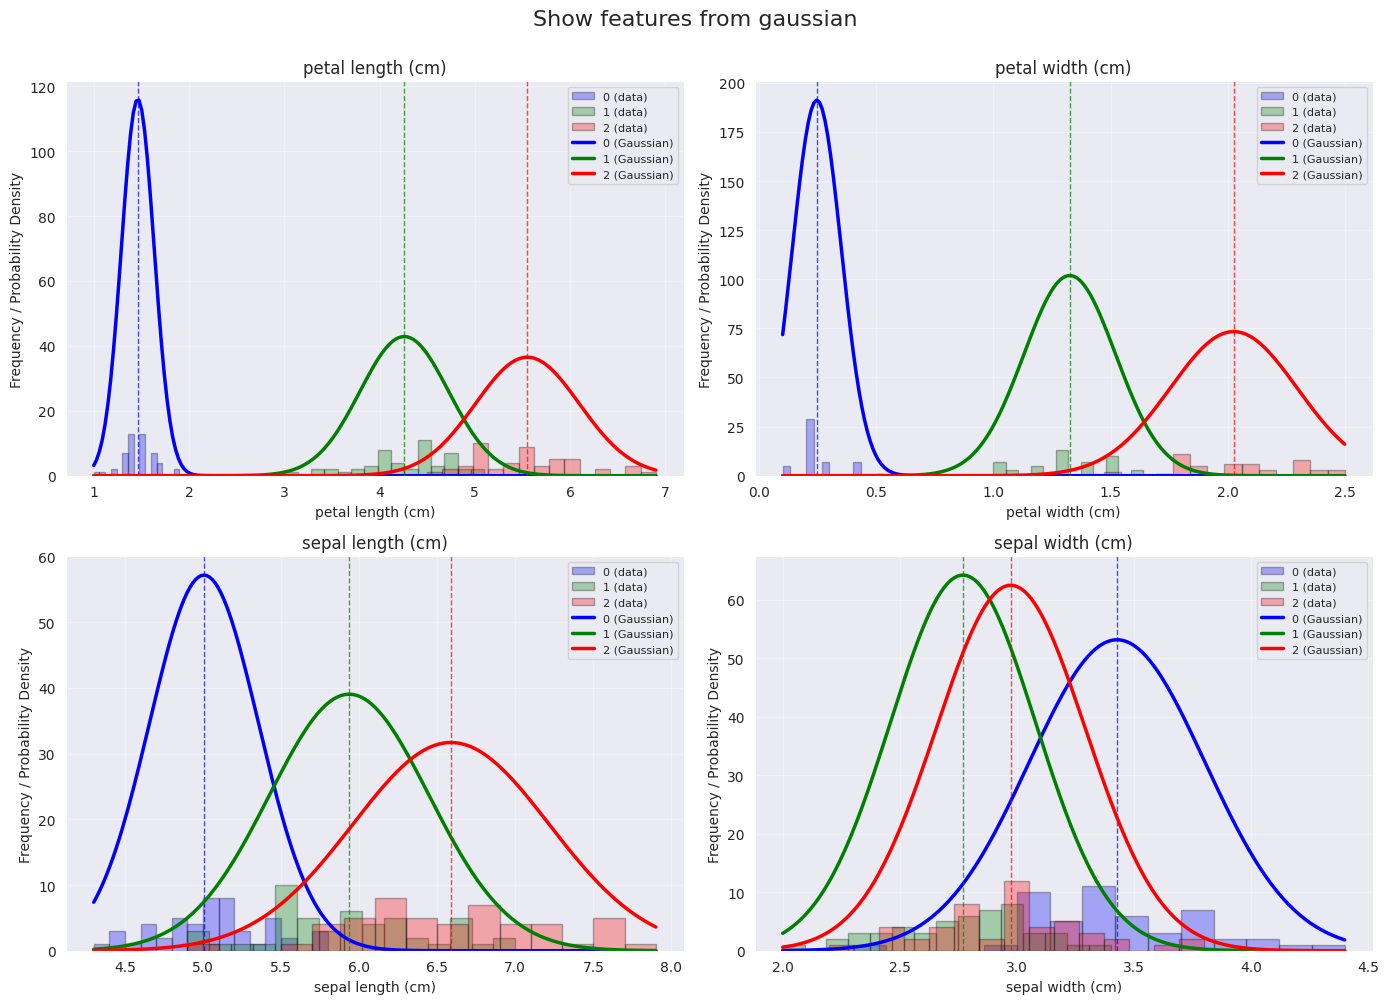

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Show features from gaussian", fontsize=16, y=1.00)

class_colors_plot = {
    classes[0]: "blue",
    classes[1]: "green", 
    classes[2]: "red"
}

for idx, feature_idx in enumerate([2, 3, 0, 1]):
    ax = axes[idx // 2, idx % 2]
    feature_name = feature_names[feature_idx]

    for cls in classes:
        cls_data = X[y == cls, feature_idx]
        ax.hist(cls_data, bins=15, alpha=0.3, label=f"{cls} (data)", 
                color=class_colors_plot[cls], edgecolor="black")

    x_range = np.linspace(X[:, feature_idx].min(), X[:, feature_idx].max(), 200)
    for cls in classes:
        mean = stats[cls][feature_idx]["mean"]
        variance = stats[cls][feature_idx]["variance"]

        probs = [gaussian_probability(x, mean, variance) for x in x_range]

        probs = np.array(probs) * 50
        
        ax.plot(x_range, probs, linewidth=2.5, 
                label=f"{cls} (Gaussian)", color=class_colors_plot[cls])
        ax.axvline(mean, color=class_colors_plot[cls], linestyle="--", 
                   linewidth=1, alpha=0.7)
    
    ax.set_xlabel(feature_name, fontsize=10)
    ax.set_ylabel("Frequency / Probability Density", fontsize=10)
    ax.set_title(f"{feature_name}", fontsize=12)
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("gaussian_distributions.png", dpi=150, bbox_inches="tight")
print("saved result as image to: gaussian_distributions.png")
plt.show()